<a href="https://colab.research.google.com/github/shivasaxena23/Experiments-DNN-Offloading/blob/main/Alpha_Non_Negligible_Average_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import random
import math

In [3]:
def randComm(x,t=0):
    r = random.random()
    r = r + t*(1-r)
    return r*x

In [4]:
def randCommTwoWay(x,t=0):
    r = random.random()
    return x/2+r*(x)

In [5]:
def randCommTwoWayExt(x,t=0):
    r = random.random()
    return x/4+r*(3*x/2)

In [6]:
def randCommTwoWayExt2(x,t=0):
    r = random.random()
    return x/8+r*(7*x/4)

In [7]:
comm = 16.384
#comm = 14.90

In [8]:
rho_avg = []
rho_avg_min = []
rho_avg_max = []
rho_avg_avg = []
rho_worst = []
rho_worst_min = []
rho_worst_max = []
rho_worst_avg = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [9]:
checker_alpha = []
checker_comp = []
checker_comm = []

In [10]:
Topt_total = []
Talg_total = []

Expectations and variances of alpha

In [11]:
ranges = []
ranges.append([0,8])
ranges.append([4,12])
ranges.append([8,16])
ranges.append([2,6])
ranges.append([6,10])
ranges.append([10,14])
ranges.append([3,5])
ranges.append([7,9])
ranges.append([11,13])

In [12]:
ranges

[[0, 8], [4, 12], [8, 16], [2, 6], [6, 10], [10, 14], [3, 5], [7, 9], [11, 13]]

In [13]:
def uniform(val):
  [a,b]=val
  rand = a/16 + random.random()*(b-a)/16
  return rand

rho_matrix = []

In [14]:
r = ranges[0]
[ uniform(r),uniform(r),uniform(r),uniform(r),uniform(r)]

[0.03690698909724199,
 0.27971769627978205,
 0.2521389915347336,
 0.1987915407995275,
 0.4706074099805942]

In [15]:
for i in ranges:
  print(uniform(i))

0.1523300275323053
0.5423801679098508
0.6962258872386068
0.36361495366516605
0.5503466265839505
0.7656165093858295
0.3025410752704026
0.5558511579788851
0.7933272934309993


In [ ]:
a = [1,2,3]
b = [2,3,4]
np.dot(a[3:],b[3:])
b[:1]


[2]

In [16]:
for r in ranges:
    rho_avg_min = []
    for comm in range(1,400,40):

        rho_min = []
        rho_max = []
        rho_avg = []
        for k in range(10000):
            current_comm = randComm(comm)
            current_comps = []
            current_comms = []
            Topt_vec = []
            Talg_vec = []
            #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
            #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
            #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
            current_comms_uniform = []
            current_comp_uniform = [1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20)]
            #current_alpha_uniform = [0.5+random.random()/2,0.5+random.random()/2,0.5+random.random()/2,0.5+random.random()/2,0.5+random.random()/2]
            current_alpha_uniform = [uniform(r),uniform(r),uniform(r),uniform(r),uniform(r),uniform(r),uniform(r),uniform(r),uniform(r),uniform(r)]
            min_alpha = min(current_alpha_uniform)
            #max_alpha = max(current_alpha_uniform)
            #avg_alpha = (2*min_alpha+max_alpha)/3
            
            #Get comm latencies
            for l in range(len(current_comp_uniform)):
                if l == 0:
                    current_comms_uniform.append(comm)
                else:
                    current_comms_uniform.append(randComm(current_comms_uniform[l-1]))
            current_comms_uniform.append(0)
            
            #ALG
            
            best_min = comm
            #best_max = comm
            #best_avg = comm
            i = 0
            comms_counter = 1
            best_point_min = 0
            #best_point_max = 0
            #best_point_avg = 0
            for l in current_comp_uniform:

                current_comp = l
                current_comm = current_comms_uniform[comms_counter]
                
                current_comps.append(current_comp)
                current_comms.append(current_comm)

                if (1-min_alpha)*sum(current_comps) + current_comm < best_min:
                    best_point_min = i+1
                    best_min = (1-min_alpha)*sum(current_comps) + current_comm
                #if (1-max_alpha)*sum(current_comps) + current_comm < best_max:
                #    best_point_max = i+1
                #    best_max = (1-max_alpha)*sum(current_comps) + current_comm
                #if (1-avg_alpha)*sum(current_comps) + current_comm < best_avg:
                #    best_point_avg = i+1
                #    best_avg = (1-avg_alpha)*sum(current_comps) + current_comm
                    

                i = i + 1
                comms_counter = comms_counter + 1
            
            if best_point_min != 10 and best_point_min != 0:
                Talg_min = sum(current_comps[:best_point_min]) + current_comms[best_point_min-1] + np.dot(current_alpha_uniform[best_point_min:],current_comp_uniform[best_point_min:])
            elif best_point_min == 0:
                Talg_min = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point_min:],current_comp_uniform[best_point_min:])
            elif best_point_min == 10:
                Talg_min = sum(current_comps[:best_point_min])
            #if best_point_max != 10 and best_point_max != 0:
            #    Talg_max = sum(current_comps[:best_point_max]) + current_comms[best_point_max-1] + np.dot(current_alpha_uniform[best_point_max:],current_comp_uniform[best_point_max:])
            #elif best_point_max == 0:
            #    Talg_max = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point_max:],current_comp_uniform[best_point_max:])
            #elif best_point_max == 10:
            #    Talg_max = sum(current_comps[:best_point_max])
            #if best_point_avg != 10 and best_point_avg != 0:
            #    Talg_avg = sum(current_comps[:best_point_avg]) + current_comms[best_point_avg-1] + np.dot(current_alpha_uniform[best_point_avg:],current_comp_uniform[best_point_avg:])
            #elif best_point_avg == 0:
            #    Talg_avg = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point_avg:],current_comp_uniform[best_point_avg:])
            #elif best_point_avg == 10:
            #    Talg_avg = sum(current_comps[:best_point_avg])
                
            current_comps_temp = current_comps
            current_comms_temp = current_comms
            
            alg_best_point = best_point_min
            
            #OPT
            
            current_comps = []
            current_comms = []
            
            best = current_comms_uniform[0] + np.dot(current_alpha_uniform,current_comp_uniform)
            i = 0
            comms_counter = 1
            best_point = 0
            for l in current_comp_uniform:

                    
                current_comp = l
                current_comm = current_comms_uniform[comms_counter]
                
                current_comps.append(current_comp)
                current_comms.append(current_comm)
                
                if sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:]) < best:
                    best_point = i+1
                    best = sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:])
            
                i = i + 1
                comms_counter = comms_counter + 1
            
            if best_point != 10 and best_point != 0:
                Topt = sum(current_comps[:best_point]) + current_comms[best_point-1] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
            elif best_point == 0:
                Topt = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
            elif best_point == 10:
                Topt = sum(current_comps[:best_point])
            
            opt_best_point = best_point
            
            if current_comps != current_comps_temp:
                print(current_comps,current_comps_temp)
            
            if current_comms != current_comms_temp:
                print(current_comms,current_comms_temp)
            
            if opt_best_point < alg_best_point:
                print ("failed point",opt_best_point,alg_best_point)
            
            if Talg_min < Topt:
                print ("failed makespan",Topt,Talg_min,opt_best_point,alg_best_point)
                checker_alpha.append(current_alpha_uniform)
                checker_comp.append(current_comp_uniform)
                checker_comm.append(current_comms_uniform)
            
            if (Talg_min/Topt) > 2:
                print ("failed proof",Topt,Talg_min,opt_best_point,alg_best_point)
            
            rho_min.append(Talg_min/Topt)
            #rho_max.append(Talg_max/Topt)
            #rho_avg.append(Talg_avg/Topt)
            '''
            Topt_vec.append(Topt)
            Talg_vec.append(Talg_min)
            #print(Talg,Topt,i,comm,best)
            '''
            
        rho_worst_min.append(np.max(rho_min))
        #rho_worst_max.append(np.max(rho_max))
        #rho_worst_avg.append(np.max(rho_avg))
        rho_avg_min.append(np.mean(rho_min))
        #rho_avg_max.append(np.mean(rho_max))
        #rho_avg_avg.append(np.mean(rho_avg))

        '''
        rho_avg.append(np.mean(rho))
        rho_median.append(np.median(rho))
        rho_60.append(np.percentile(rho,60))
        rho_70.append(np.percentile(rho,70))
        rho_80.append(np.percentile(rho,80))
        Topt_total.append(np.mean(Topt_vec))
        Talg_total.append(np.mean(Talg_vec))
        '''
    print(len(rho_worst_min))
    #rho_matrix.append(rho_worst_min)
    rho_matrix.append(rho_avg_min)

[0, 8]
10
[4, 12]
20
[8, 16]
30
[2, 6]
40
[6, 10]
50
[10, 14]
60
[3, 5]
70
[7, 9]
80
[11, 13]
90


In [17]:
np.array(rho_matrix).shape

(9, 10)

In [18]:
with open('Alpha-Experiment-Non_Negligible-3x3.npy', 'wb') as f:
  np.save(f,np.array(rho_matrix))

In [19]:
with open('Alpha-Experiment-Non_Negligible-3x3.npy', 'rb') as f:
  rho_matrix = np.load(f)

In [25]:
rho_matrix.shape
rho_matrix[0]

array([1.00001061, 1.00743462, 1.00636312, 1.00519523, 1.00594449,
       1.00494232, 1.00415132, 1.00519283, 1.00539278, 1.0046525 ])

Same Expectation Different Variance

Text(0, 0.5, 'Competitive Ratio')

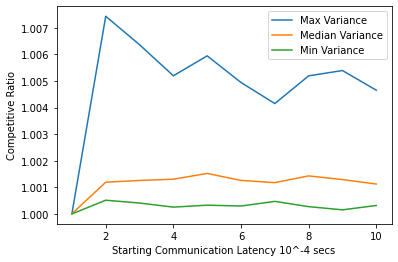

In [29]:
#1
plt.plot(range(1,11),rho_matrix[0],label="Max Variance")
plt.plot(range(1,11),rho_matrix[3],label="Median Variance")
plt.plot(range(1,11),rho_matrix[6],label="Min Variance")


plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Text(0, 0.5, 'Competitive Ratio')

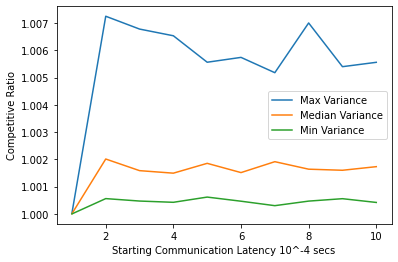

In [30]:
#2
plt.plot(range(1,11),rho_matrix[1],label="Max Variance")
plt.plot(range(1,11),rho_matrix[4],label="Median Variance")
plt.plot(range(1,11),rho_matrix[7],label="Min Variance")


plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Text(0, 0.5, 'Competitive Ratio')

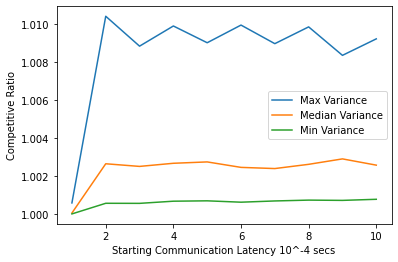

In [31]:
#3
plt.plot(range(1,11),rho_matrix[2],label="Max Variance")
plt.plot(range(1,11),rho_matrix[5],label="Median Variance")
plt.plot(range(1,11),rho_matrix[8],label="Min Variance")


plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Same Variance different Expectation


Text(0, 0.5, 'Competitive Ratio')

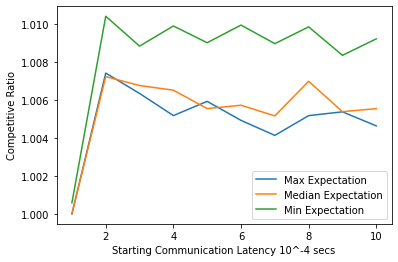

In [32]:
#1
plt.plot(range(1,11),rho_matrix[0],label="Max Expectation")
plt.plot(range(1,11),rho_matrix[1],label="Median Expectation")
plt.plot(range(1,11),rho_matrix[2],label="Min Expectation")


plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")

Text(0, 0.5, 'Competitive Ratio')

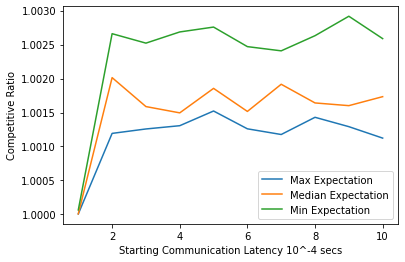

In [33]:
#2
plt.plot(range(1,11),rho_matrix[3],label="Max Expectation")
plt.plot(range(1,11),rho_matrix[4],label="Median Expectation")
plt.plot(range(1,11),rho_matrix[5],label="Min Expectation")


plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")

Text(0, 0.5, 'Competitive Ratio')

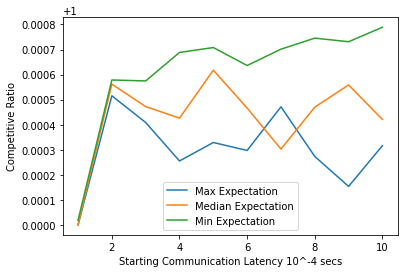

In [34]:
#2
plt.plot(range(1,11),rho_matrix[6],label="Max Expectation")
plt.plot(range(1,11),rho_matrix[7],label="Median Expectation")
plt.plot(range(1,11),rho_matrix[8],label="Min Expectation")


plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")

Worst case matrix

In [35]:
for i in rho_matrix:
  print(np.max(i))

1.007434616717421
1.0072505306033879
1.0104328006380292
1.0015222440647362
1.002013781770709
1.0029173303971561
1.0005154744851141
1.0006176888924785
1.0007889483189139


In [ ]:
rho_worst_avg.sort(reverse=True)
rho_worst_avg[:5]

[1.4372292289005333,
 1.3986649120867753,
 1.372936758050973,
 1.3640298267441906,
 1.3632144966837139]

As it is easy to see, the algorithm offloads when the computation latency after the current best offload point exceeds the communication latency of the current best offload point.  (As it can not go back to the previous layer to offload) It has to offload at whatever communication latency is available, which can be randomly large, resulting in an excessively large Talg and hence the rho.

Text(0, 0.5, 'Competitive Ratio')

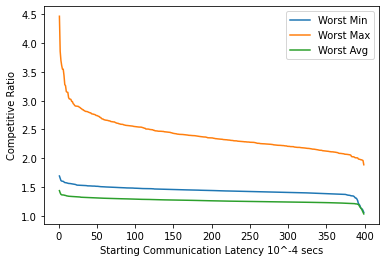

In [ ]:
#4
plt.plot(range(1,400),rho_worst_min,label="Worst Min")
plt.plot(range(1,400),rho_worst_max,label="Worst Max")
plt.plot(range(1,400),rho_worst_avg,label="Worst Avg")


plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Text(0, 0.5, 'Competitive Ratio')

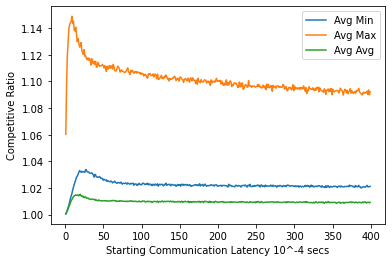

In [ ]:
#4
plt.plot(range(1,400),rho_avg_min,label="Avg Min")
plt.plot(range(1,400),rho_avg_max,label="Avg Max")
plt.plot(range(1,400),rho_avg_avg,label="Avg Avg")


plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Alpha Min

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(20000):
        current_comm = randComm(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comms_uniform = []
        current_comp_uniform = [1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20)]
        current_alpha_uniform = [random.random(),random.random(),random.random(),random.random(),random.random()]
        min_alpha = min(current_alpha_uniform)
        
        #Get comm latencies
        for l in range(len(current_comp_uniform)):
            if l == 0:
                current_comms_uniform.append(comm)
            else:
                current_comms_uniform.append(randComm(current_comms_uniform[l-1]))
        current_comms_uniform.append(0)
        
        #ALG
        
        best = comm        
        i = 0
        comms_counter = 1
        best_point = 0
        for l in current_comp_uniform:

            current_comp = l
            current_comm = current_comms_uniform[comms_counter]
            
            current_comps.append(current_comp)
            current_comms.append(current_comm)

            if (1-min_alpha)*sum(current_comps) + current_comm < best:
                best_point = i+1
                best = (1-min_alpha)*sum(current_comps) + current_comm
                

            i = i + 1
            comms_counter = comms_counter + 1
        
        if best_point != 5 and best_point != 0:
            Talg = sum(current_comps[:best_point]) + current_comms[best_point-1] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
        elif best_point == 0:
            Talg = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
        elif best_point == 5:
            Talg = sum(current_comps[:best_point])
        
        current_comps_temp = current_comps
        current_comms_temp = current_comms
        
        alg_best_point = best_point
        
        #OPT
        
        current_comps = []
        current_comms = []
        
        best = current_comms_uniform[0] + np.dot(current_alpha_uniform,current_comp_uniform)
        i = 0
        comms_counter = 1
        best_point = 0
        for l in current_comp_uniform:

                
            current_comp = l
            current_comm = current_comms_uniform[comms_counter]
            
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            
            if sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:]) < best:
                best_point = i+1
                best = sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:])
        
            i = i + 1
            comms_counter = comms_counter + 1
        
        if best_point != 5 and best_point != 0:
            Topt = sum(current_comps[:best_point]) + current_comms[best_point-1] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
        elif best_point == 0:
            Topt = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
        elif best_point == 5:
            Topt = sum(current_comps[:best_point])
        
        opt_best_point = best_point
        
        if current_comps != current_comps_temp:
            print(current_comps,current_comps_temp)
        
        if current_comms != current_comms_temp:
            print(current_comms,current_comms_temp)
        
        if opt_best_point < alg_best_point:
            print ("failed point",opt_best_point,alg_best_point)
        
        if Talg < Topt:
            print ("failed makespan",Topt,Talg,opt_best_point,alg_best_point)
            checker_alpha.append(current_alpha_uniform)
            checker_comp.append(current_comp_uniform)
            checker_comm.append(current_comms_uniform)
        
        if (Talg/Topt) > 2:
            print ("failed proof",Topt,Talg,opt_best_point,alg_best_point)
        
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        #print(Talg,Topt,i,comm,best)

        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))


In [ ]:
rho_worst.sort(reverse=True)
rho_worst[:5]

[1.8215026759240092,
 1.7790903516086896,
 1.7758836147759285,
 1.775781806280184,
 1.7741620195885568]

As it is easy to see, the algorithm offloads when the computation latency after the current best offload point exceeds the communication latency of the current best offload point.  (As it can not go back to the previous layer to offload) It has to offload at whatever communication latency is available, which can be randomly large, resulting in an excessively large Talg and hence the rho.

Text(0, 0.5, 'Competitive Ratio')

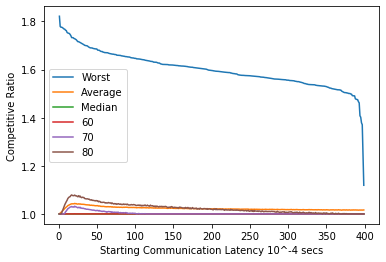

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


In [ ]:
checker_comp[0][0] + checker_comm[0][1]+np.dot(checker_alpha[0][1:],checker_comp[0][1:])

In [ ]:
checker_comm[0][0]+np.dot(checker_alpha[0][0:],checker_comp[0][0:])

33.254202206722226

Alpha Max

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = randComm(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comms_uniform = []
        current_comp_uniform = [1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20)]
        current_alpha_uniform = [random.random(),random.random(),random.random(),random.random(),random.random()]
        max_alpha = max(current_alpha_uniform)
        
        #Get comm latencies
        for l in range(len(current_comp_uniform)):
            if l == 0:
                current_comms_uniform.append(comm)
            else:
                current_comms_uniform.append(randComm(current_comms_uniform[l-1]))
        current_comms_uniform.append(0)
        
        #ALG
        
        best = comm        
        i = 0
        comms_counter = 1
        best_point = 0
        for l in current_comp_uniform:

            current_comp = l
            current_comm = current_comms_uniform[comms_counter]
            
            current_comps.append(current_comp)
            current_comms.append(current_comm)

            if (1-max_alpha)*sum(current_comps) + current_comm < best:
                best_point = i+1
                best = (1-max_alpha)*sum(current_comps) + current_comm
                

            i = i + 1
            comms_counter = comms_counter + 1
        
        if best_point != 5 and best_point != 0:
            Talg = sum(current_comps[:best_point]) + current_comms[best_point-1] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
        elif best_point == 0:
            Talg = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
        elif best_point == 5:
            Talg = sum(current_comps[:best_point])
        
        current_comps_temp = current_comps
        current_comms_temp = current_comms
        
        alg_best_point = best_point
        
        #OPT
        
        current_comps = []
        current_comms = []
        
        best = current_comms_uniform[0] + np.dot(current_alpha_uniform,current_comp_uniform)
        i = 0
        comms_counter = 1
        best_point = 0
        for l in current_comp_uniform:

                
            current_comp = l
            current_comm = current_comms_uniform[comms_counter]
            
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            
            if sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:]) < best:
                best_point = i+1
                best = sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:])
        
            i = i + 1
            comms_counter = comms_counter + 1
        
        if best_point != 5 and best_point != 0:
            Topt = sum(current_comps[:best_point]) + current_comms[best_point-1] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
        elif best_point == 0:
            Topt = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
        elif best_point == 5:
            Topt = sum(current_comps[:best_point])
        
        opt_best_point = best_point
        
        if current_comps != current_comps_temp:
            print(current_comps,current_comps_temp)
        
        if current_comms != current_comms_temp:
            print(current_comms,current_comms_temp)
        
        #if opt_best_point < alg_best_point:
        #    print ("failed point",opt_best_point,alg_best_point)
        
        if Talg < Topt:
            print ("failed makespan",Topt,Talg,opt_best_point,alg_best_point)
   
        
        #if (Talg/Topt) > 2:
        #    print ("failed proof",Topt,Talg,opt_best_point,alg_best_point)
        
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        #print(Talg,Topt,i,comm,best)

        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))


In [ ]:
rho_worst.sort(reverse=True)
rho_worst[:5]

[6.353622601268058,
 5.959894249043557,
 5.928741349323925,
 5.537761670578516,
 4.902222867789452]

As it is easy to see, the algorithm offloads when the computation latency after the current best offload point exceeds the communication latency of the current best offload point.  (As it can not go back to the previous layer to offload) It has to offload at whatever communication latency is available, which can be randomly large, resulting in an excessively large Talg and hence the rho.

Text(0, 0.5, 'Competitive Ratio')

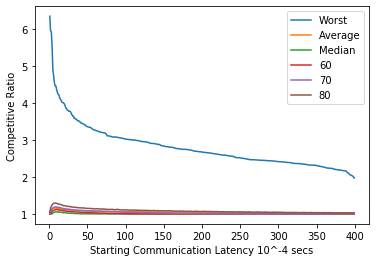

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Alpha (Min+Max)/2

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = randComm(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comms_uniform = []
        current_comp_uniform = [1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20)]
        current_alpha_uniform = [random.random(),random.random(),random.random(),random.random(),random.random()]
        avg_alpha = (max(current_alpha_uniform) + min(current_alpha_uniform))/2

        
        #Get comm latencies
        for l in range(len(current_comp_uniform)):
            if l == 0:
                current_comms_uniform.append(comm)
            else:
                current_comms_uniform.append(randComm(current_comms_uniform[l-1]))
        current_comms_uniform.append(0)
        
        #ALG
        
        best = comm        
        i = 0
        comms_counter = 1
        best_point = 0
        for l in current_comp_uniform:

            current_comp = l
            current_comm = current_comms_uniform[comms_counter]
            
            current_comps.append(current_comp)
            current_comms.append(current_comm)

            if (1-avg_alpha)*sum(current_comps) + current_comm < best:
                best_point = i+1
                best = (1-avg_alpha)*sum(current_comps) + current_comm
                

            i = i + 1
            comms_counter = comms_counter + 1
        
        if best_point != 5 and best_point != 0:
            Talg = sum(current_comps[:best_point]) + current_comms[best_point-1] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
        elif best_point == 0:
            Talg = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
        elif best_point == 5:
            Talg = sum(current_comps[:best_point])
        
        current_comps_temp = current_comps
        current_comms_temp = current_comms
        
        alg_best_point = best_point
        
        #OPT
        
        current_comps = []
        current_comms = []
        
        best = current_comms_uniform[0] + np.dot(current_alpha_uniform,current_comp_uniform)
        i = 0
        comms_counter = 1
        best_point = 0
        for l in current_comp_uniform:

                
            current_comp = l
            current_comm = current_comms_uniform[comms_counter]
            
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            
            if sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:]) < best:
                best_point = i+1
                best = sum(current_comps) + current_comm + np.dot(current_alpha_uniform[comms_counter:],current_comp_uniform[comms_counter:])
        
            i = i + 1
            comms_counter = comms_counter + 1
        
        if best_point != 5 and best_point != 0:
            Topt = sum(current_comps[:best_point]) + current_comms[best_point-1] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
        elif best_point == 0:
            Topt = current_comms_uniform[0] + np.dot(current_alpha_uniform[best_point:],current_comp_uniform[best_point:])
        elif best_point == 5:
            Topt = sum(current_comps[:best_point])
        
        opt_best_point = best_point
        
        if current_comps != current_comps_temp:
            print(current_comps,current_comps_temp)
        
        if current_comms != current_comms_temp:
            print(current_comms,current_comms_temp)
        
        #if opt_best_point < alg_best_point:
        #    print ("failed point",opt_best_point,alg_best_point)
        
        if Talg < Topt:
            print ("failed makespan",Topt,Talg,opt_best_point,alg_best_point)
            checker_alpha.append(current_alpha_uniform)
            checker_comp.append(current_comp_uniform)
            checker_comm.append(current_comms_uniform)
        
        #if (Talg/Topt) > 2:
        #    print ("failed proof",Topt,Talg,opt_best_point,alg_best_point)
        
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        #print(Talg,Topt,i,comm,best)

        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))


In [ ]:
rho_worst.sort(reverse=True)
rho_worst[:5]

[1.5357327286747067,
 1.532842189574775,
 1.5035619583635655,
 1.5027557797859643,
 1.4942909398732271]

As it is easy to see, the algorithm offloads when the computation latency after the current best offload point exceeds the communication latency of the current best offload point.  (As it can not go back to the previous layer to offload) It has to offload at whatever communication latency is available, which can be randomly large, resulting in an excessively large Talg and hence the rho.

Text(0, 0.5, 'Competitive Ratio')

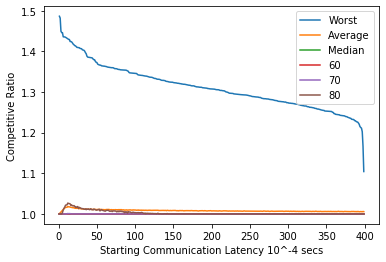

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


In [ ]:
for comm in range(1,120):
    rho = []
    for r in range(10000):
        current_comm = randComm(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comms_uniform = []
        current_comp_uniform = [1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20)]
        current_alpha_uniform = [random.random(),random.random(),random.random(),random.random(),random.random()]
        min_alpha = min(current_alpha_uniform)
        
        #Get comm latencies
        for l in range(len(current_comp_uniform)):
            if l == 0:
                current_comms_uniform.append(comm)
            else:
                current_comms_uniform.append(randComm(current_comms_uniform[l-1]))
        current_comms_uniform.append(0)
                
        comms_counter = 0
        best_point = 0
        for l in current_comp_uniform:

            current_comp = l
            #current_comm = randComm(comm,0)
            current_comm = current_comms_uniform[comms_counter+1]
            comms_counter = comms_counter + 1
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if (1-min_alpha)*sum(current_comps) + current_comm < best:
                best_point = i
                best = (1-min_alpha)*sum(current_comps) + current_comm
                 
            if (1-min_alpha)*sum(current_comps) > best:
                break

            i = i + 1
        
  
        
        counter = 0
        current_comps = []
        best = current_comms_uniform[0] + np.dot(current_alpha_uniform,current_comp_uniform)
        
        for l in current_comp_uniform:

            counter = counter + 1
            current_comp = l
            current_comps.append(current_comp)
            if counter == 5:
                current_comm = 0
            else:
                current_comm = current_comms_uniform[counter]
            remote_comp = np.dot(current_alpha_uniform[counter:],current_comp_uniform[counter:])

            if sum(current_comps) + current_comp + remote_comp < best:
                best = sum(current_comps) + current_comp + remote_comp
        
        Topt = 0
        Talg = 0
        
        Topt = best
        
        if i == 5:
            Talg = sum(current_comp_uniform)
        else:
            proc = sum(current_comp_uniform[:(best_point+1)])
        
        if i != 5:
            Talg = proc + current_comms_uniform[best_point+1] + current_comms_uniform[i] + np.dot(current_alpha_uniform[i:],current_comp_uniform[i:])
            rho.append(Talg/Topt)
            Topt_vec.append(Topt)
            Talg_vec.append(Talg)
        #print(Talg,Topt,i,comm,best)

        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

/home/shiva/anaconda3/envs/online/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/shiva/anaconda3/envs/online/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
rho_worst.sort(reverse=True)
rho_worst[:5]

[14.902482733468554,
 11.398137227558044,
 11.249366477095599,
 10.480601938180335,
 10.437935490169057]

As it is easy to see, the algorithm offloads when the computation latency after the current best offload point exceeds the communication latency of the current best offload point.  (As it can not go back to the previous layer to offload) It has to offload at whatever communication latency is available, which can be randomly large, resulting in an excessively large Talg and hence the rho.

Text(0, 0.5, 'Competitive Ratio')

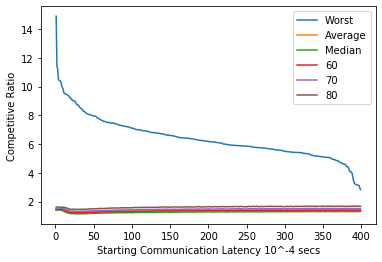

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


One Way Communication and Two Way Computation

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = randComm(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [randCommTwoWay(20),randCommTwoWay(20),randCommTwoWay(20),randCommTwoWay(20),randCommTwoWay(20)]
        
        for l in current_comp_uniform:

            current_comp = l
            #current_comm = randComm(comm,0)
            current_comm = randComm(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

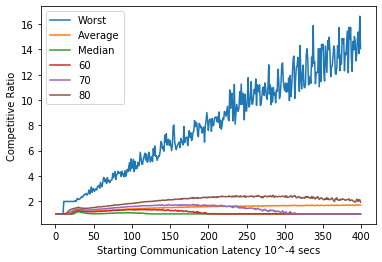

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


One Way Communication and Two Way Computation 1+

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = 1+randComm(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [1+randCommTwoWay(20),1+randCommTwoWay(20),1+randCommTwoWay(20),1+randCommTwoWay(20),1+randCommTwoWay(20)]
        
        for l in current_comp_uniform:

            current_comp = l
            #current_comm = randComm(comm,0)
            current_comm = 1+randComm(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

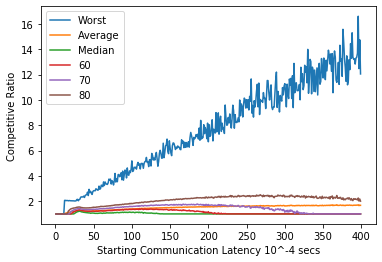

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


One Way Communication and Two Way Ext Computation

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = randComm(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [randCommTwoWayExt(80),randCommTwoWayExt(80),randCommTwoWayExt(80),randCommTwoWayExt(80),randCommTwoWayExt(80)]
        
        for l in current_comp_uniform:

            current_comp = l
            #current_comm = randComm(comm,0)
            current_comm = randComm(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

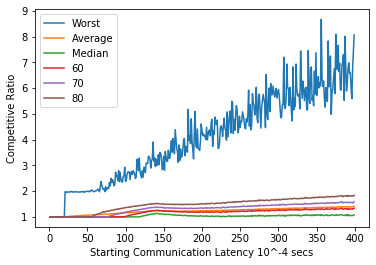

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Two Way Communication and One Way Computation

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = randCommTwoWay(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20)]
        
        for l in current_comp_uniform:

            current_comp = l
            #current_comm = randComm(comm,0)
            current_comm = randCommTwoWay(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

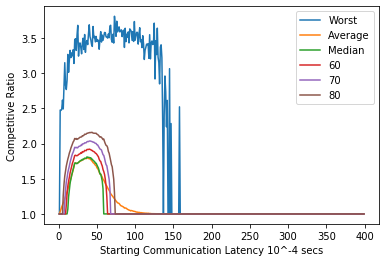

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Two Way Communication and One Way Computation 1+

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = 1+randCommTwoWay(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20)]
        
        for l in current_comp_uniform:

            current_comp = l
            #current_comm = randComm(comm,0)
            current_comm = 1+randCommTwoWay(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

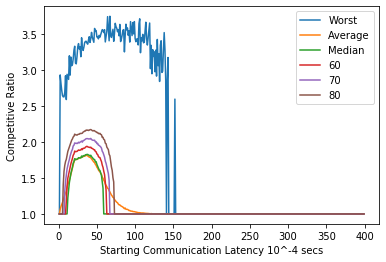

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Two Way communication with Two way Computation

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = randCommTwoWay(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [randCommTwoWay(20),randCommTwoWay(20),randCommTwoWay(20),randCommTwoWay(20),randCommTwoWay(20)]
        #current_comp_uniform = [randCommTwoWay(80),randCommTwoWay(80),randCommTwoWay(80),randCommTwoWay(80),randCommTwoWay(80)]
        
        for l in current_comp_uniform:

            current_comp = l
            #current_comm = randComm(comm,0)
            current_comm = randCommTwoWay(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

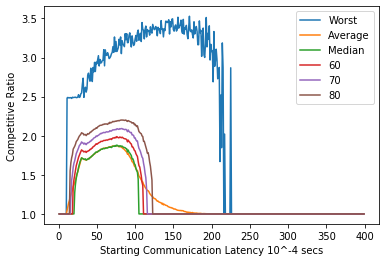

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Two Way communication with Two way Ext Computation

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = randCommTwoWay(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [randCommTwoWayExt(20),randCommTwoWayExt(20),randCommTwoWayExt(20),randCommTwoWayExt(20),randCommTwoWayExt(20)]
        #current_comp_uniform = [randCommTwoWay(80),randCommTwoWay(80),randCommTwoWay(80),randCommTwoWay(80),randCommTwoWay(80)]
        
        for l in current_comp_uniform:

            current_comp = l
            #current_comm = randComm(comm,0)
            current_comm = randCommTwoWay(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

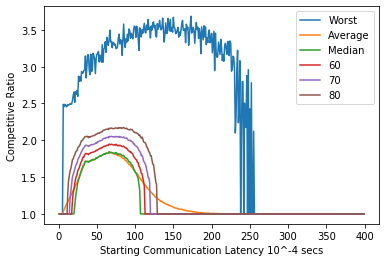

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Two Way Ext Communication and One Way Computation 1+

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = 1+randCommTwoWayExt(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20)]
        
        for l in current_comp_uniform:

            current_comp = l
            current_comm = 1+randCommTwoWayExt(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

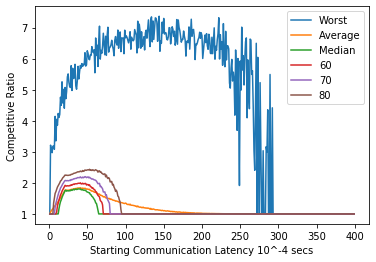

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Two Way Ext Communication and One Way Computation

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = randCommTwoWayExt(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20),1+randComm(20)]
        
        for l in current_comp_uniform:

            current_comp = l
            current_comm = randCommTwoWayExt(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

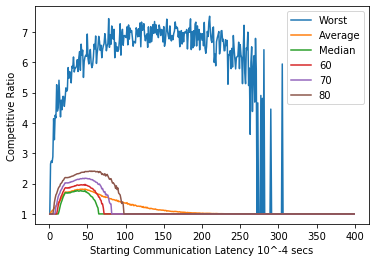

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Two Way Ext Communication and Two Way Computation

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = randCommTwoWayExt(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [randCommTwoWay(20),randCommTwoWay(20),randCommTwoWay(20),randCommTwoWay(20),randCommTwoWay(20)]
        
        for l in current_comp_uniform:

            current_comp = l
            current_comm = randCommTwoWayExt(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

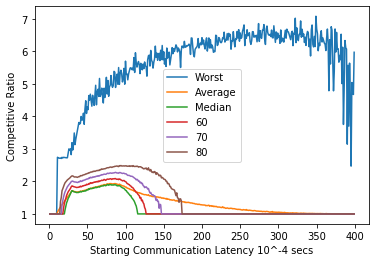

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Two Way Ext Communication and Two Way Ext Computation

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = randCommTwoWayExt(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [randCommTwoWayExt(10),randCommTwoWayExt(10),randCommTwoWayExt(10),randCommTwoWayExt(10),randCommTwoWayExt(10)]
        
        for l in current_comp_uniform:

            current_comp = l
            current_comm = randCommTwoWayExt(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

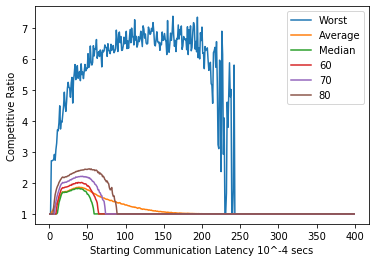

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Two Way Ext2 Communication and One Way Computation

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,400):
    rho = []
    for r in range(10000):
        current_comm = randCommTwoWayExt2(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [1+math.floor(80*random.random()),1+math.floor(80*random.random()),1+math.floor(80*random.random()),1+math.floor(80*random.random()),1+math.floor(80*random.random())]
        
        for l in current_comp_uniform:

            current_comp = l
            current_comm = randCommTwoWayExt2(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

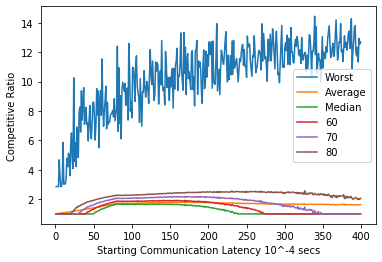

In [ ]:
#4
plt.plot(range(1,400),rho_worst,label="Worst")
plt.plot(range(1,400),rho_avg,label="Average")
plt.plot(range(1,400),rho_median,label="Median")
plt.plot(range(1,400),rho_60,label="60")
plt.plot(range(1,400),rho_70,label="70")
plt.plot(range(1,400),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Two Way Ext2 Communication and Two Way Computation

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,2000):
    rho = []
    for r in range(10000):
        current_comm = randCommTwoWayExt2(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [randCommTwoWay(20),randCommTwoWay(20),randCommTwoWay(20),randCommTwoWay(20),randCommTwoWay(20)]
        
        for l in current_comp_uniform:

            current_comp = l
            current_comm = randCommTwoWayExt2(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

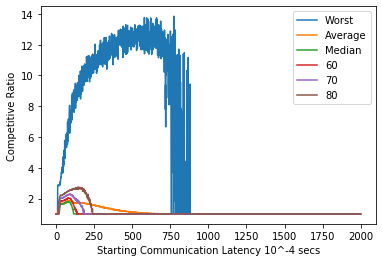

In [ ]:
#4
plt.plot(range(1,2000),rho_worst,label="Worst")
plt.plot(range(1,2000),rho_avg,label="Average")
plt.plot(range(1,2000),rho_median,label="Median")
plt.plot(range(1,2000),rho_60,label="60")
plt.plot(range(1,2000),rho_70,label="70")
plt.plot(range(1,2000),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


Two Way Ext2 Communication and Two Way Ext Computation

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []


In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
for comm in range(1,2000):
    rho = []
    for r in range(10000):
        current_comm = randCommTwoWayExt2(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        #current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        current_comp_uniform = [randCommTwoWayExt2(10),randCommTwoWayExt2(10),randCommTwoWayExt2(10),randCommTwoWayExt2(10),randCommTwoWayExt2(10)]
        
        for l in current_comp_uniform:

            current_comp = l
            current_comm = randCommTwoWayExt2(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

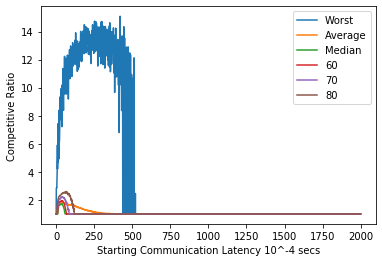

In [ ]:
#4
plt.plot(range(1,2000),rho_worst,label="Worst")
plt.plot(range(1,2000),rho_avg,label="Average")
plt.plot(range(1,2000),rho_median,label="Median")
plt.plot(range(1,2000),rho_60,label="60")
plt.plot(range(1,2000),rho_70,label="70")
plt.plot(range(1,2000),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")


From Main Code

In [ ]:
import random

In [ ]:
def randCommTwoWay(x,t=0):
    r = random.random()
    return x/2+r*(x)

In [ ]:
#comm = 16.384
#comm = 14.90

In [ ]:
rho_avg = []
rho_worst = []
rho_median = []
rho_60 = []
rho_70 = []
rho_80 = []
rho_90 = []
rho_95 = []
rho_99 = []

In [ ]:
Topt_total = []
Talg_total = []

In [ ]:
#np.linspace(2,100000,50)
for comm in range(2,80):
    rho = []
    for r in range(10000):
        current_comm = randCommTwoWay(comm)
        current_comps = []
        current_comms = []
        Topt_vec = []
        Talg_vec = []
        best = current_comm
        i = 0
        #current_comp_uniform = [1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random()),1+math.floor(4*random.random())]
        #current_comp_uniform = [1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random()),1+math.floor(16*random.random())]
        current_comp_uniform = [1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random()),1+math.floor(64*random.random())]
        for l in current_comp_uniform:

            current_comp = l
            current_comm = randCommTwoWay(comm)
            current_comps.append(current_comp)
            current_comms.append(current_comm)
            if sum(current_comps) + current_comm < best:
                best = sum(current_comps) + current_comm
                
                
            if sum(current_comps) > best:
                break

            i = i + 1
        
        Topt = best
        if  i == 5:
            Talg = sum(current_comps)
            Topt = sum(current_comps)
        elif i >= 1:
            Talg = sum(current_comps[:-1]) + current_comms[-2]
        else:
            Talg = comm
        #print(Talg,Topt,i,comm,best)
        rho.append(Talg/Topt)
        Topt_vec.append(Topt)
        Talg_vec.append(Talg)
        
    rho_worst.append(np.max(rho))
    rho_avg.append(np.mean(rho))
    rho_median.append(np.median(rho))
    rho_60.append(np.percentile(rho,60))
    rho_70.append(np.percentile(rho,70))
    rho_80.append(np.percentile(rho,80))
    rho_90.append(np.percentile(rho,90))
    rho_95.append(np.percentile(rho,95))
    rho_99.append(np.percentile(rho,99))
    Topt_total.append(np.mean(Topt_vec))
    Talg_total.append(np.mean(Talg_vec))

Text(0, 0.5, 'Competitive Ratio')

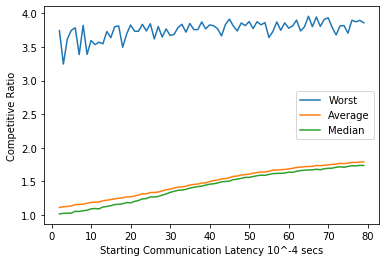

In [ ]:
#4
plt.plot(range(2,80),rho_worst,label="Worst")
plt.plot(range(2,80),rho_avg,label="Average")
plt.plot(range(2,80),rho_median,label="Median")
# plt.plot(np.linspace(2,100000,50),rho_60,label="60")
# plt.plot(np.linspace(2,100000,50),rho_70,label="70")
# plt.plot(np.linspace(2,100000,50),rho_80,label="80")

plt.legend()
plt.xlabel("Starting Communication Latency 10^-4 secs")
plt.ylabel("Competitive Ratio")
